## Recall@K graphs for predictors

In [1]:
# all aux imports
import pandas as pd
import numpy as np
import pickle
import random
import glob
from pathlib import Path
import csv
from collections import namedtuple, defaultdict
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style(style='whitegrid')

%matplotlib inline

In [2]:
XP_NAMES = ['baselines', 'sdae_optimized']
XP_PATHS = ['./xps/%s/' % name for name in XP_NAMES]

In [3]:
XP_PATHS

['./xps/baselines/', './xps/sdae_optimized/']

In [4]:
## load categories of amazon DS

parent_path = r'D:\Datasets\amazon_reviews\gzips'
files = [Path(f) for f in glob.glob(parent_path  + r"\*.gz", recursive=False)]
categories = [' '.join(file.stem.split('_')[1:-1]) for file in files]

In [5]:
categories

['Books',
 'CDs and Vinyl',
 'Cell Phones and Accessories',
 'Clothing Shoes and Jewelry',
 'Electronics',
 'Health and Personal Care',
 'Home and Kitchen',
 'Kindle Store',
 'Movies and TV',
 'Sports and Outdoors',
 'Toys and Games',
 'Video Games']

In [6]:
predictors = ['Normal Predictor', 'CDL-SDAE', 'SVD-15']

In [7]:
lookup_paths =  [path + f for path in XP_PATHS for f in os.listdir(path)] 

In [8]:
lookup_paths

['./xps/baselines/.ipynb_checkpoints',
 './xps/baselines/kpr_Normal Predictor_Books.csv',
 './xps/baselines/kpr_Normal Predictor_CDs and Vinyl.csv',
 './xps/baselines/kpr_Normal Predictor_Cell Phones and Accessories.csv',
 './xps/baselines/kpr_Normal Predictor_Clothing Shoes and Jewelry.csv',
 './xps/baselines/kpr_Normal Predictor_Electronics.csv',
 './xps/baselines/kpr_Normal Predictor_Health and Personal Care.csv',
 './xps/baselines/kpr_Normal Predictor_Home and Kitchen.csv',
 './xps/baselines/kpr_Normal Predictor_Kindle Store.csv',
 './xps/baselines/kpr_Normal Predictor_Movies and TV.csv',
 './xps/baselines/kpr_Normal Predictor_Sports and Outdoors.csv',
 './xps/baselines/kpr_Normal Predictor_Toys and Games.csv',
 './xps/baselines/kpr_Normal Predictor_Video Games.csv',
 './xps/baselines/kpr_SVD-15_Books.csv',
 './xps/baselines/kpr_SVD-15_CDs and Vinyl.csv',
 './xps/baselines/kpr_SVD-15_Cell Phones and Accessories.csv',
 './xps/baselines/kpr_SVD-15_Clothing Shoes and Jewelry.csv',
 '.

In [9]:
## Load DataFrames
df_per_cat = {}
for cat in categories:
    dfs = []
    for p in predictors:
        file_name = 'kpr_%s_%s.csv' % (p, cat)
        file_paths = [lp for lp in lookup_paths if lp.endswith(file_name)]
        if len(file_paths) != 0:
            df  = pd.read_csv(file_paths[0])
            dfs.append(df)
        else:
            print('No file found for %s' % file_name)
    #complete_df = pd.merge(*dfs, on ='k')
    df_per_cat[cat] = dfs

No file found for kpr_CDL-SDAE_Books.csv
No file found for kpr_CDL-SDAE_CDs and Vinyl.csv
No file found for kpr_CDL-SDAE_Cell Phones and Accessories.csv
No file found for kpr_CDL-SDAE_Clothing Shoes and Jewelry.csv
No file found for kpr_CDL-SDAE_Electronics.csv
No file found for kpr_CDL-SDAE_Health and Personal Care.csv
No file found for kpr_CDL-SDAE_Home and Kitchen.csv
No file found for kpr_CDL-SDAE_Kindle Store.csv
No file found for kpr_CDL-SDAE_Movies and TV.csv
No file found for kpr_CDL-SDAE_Sports and Outdoors.csv
No file found for kpr_CDL-SDAE_Toys and Games.csv


In [10]:
df_per_cat.keys()

dict_keys(['Books', 'Movies and TV', 'Toys and Games', 'Clothing Shoes and Jewelry', 'Electronics', 'Video Games', 'Kindle Store', 'CDs and Vinyl', 'Health and Personal Care', 'Cell Phones and Accessories', 'Sports and Outdoors', 'Home and Kitchen'])

## Visualize categories

In [11]:
def viz_cat(cat, label='recall'):
    f, ax = plt.subplots()#figsize=(8, 5))
    ax.set(xlim=(0, 20), ylim = (0, 1))

    labels = []
    for df in df_per_cat[cat]: 
        sns.lineplot(y=label, x = 'k', palette='deep', data=df.sort_values(by='k'), ax = ax)
        labels.append(df.iloc[0].predictor)

    plt.legend(labels, loc='lower right')
    ax.set(xlabel='M', ylabel=label[0].upper() + label[1:])
    plt.tight_layout()


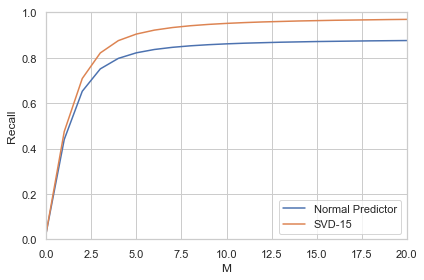

In [97]:
viz_cat('Books')

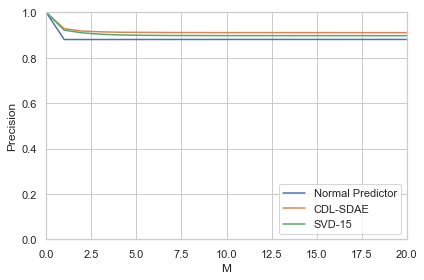

In [13]:
viz_cat('Video Games', 'precision')